# Prévision des AVC

Fracasso Pauline
Morvan Niamh 

# **INSTALLATION & IMPORTATION**

###Installation des bibliothèques##

In [ ]:
!pip install sklearn_evaluation

In [ ]:
#!pip install tensorflow==2.11.0

In [ ]:
!pip install scikeras

###Importation des bibliothèques##

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import scipy.stats as stats
import statsmodels.api

In [ ]:
#Modélisation 
#Téléchargement données
from sklearn import datasets
from sklearn.datasets import make_classification
#Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression
#Multiclass strategie
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#Regressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
#Évaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot
#Séparation de la base de données en split et train
from sklearn.model_selection import train_test_split
#Standardisation
from sklearn.preprocessing import StandardScaler
#tenserflow
from tensorflow import keras
from tensorflow.random import set_seed
from keras.models import Sequential
from keras.layers import Dense, Flatten
#Pour la fonction Grubbs et ESD
import scipy.stats as stats
#Pour le test de khi2
from scipy.stats import chi2_contingency
#Pour test anova
import statsmodels.api
from scikeras.wrappers import KerasClassifier, KerasRegressor
#Test de Kolmogorov smirnov
from scipy.stats import kstest
#test de mann-witney
from scipy.stats import mannwhitneyu
#test chi2
from scipy.stats import chi2_contingency
#skewness et Kurtosis
from scipy.stats import kurtosis
from scipy.stats import skew

# **IMPORTATION DES DONNÉES**

In [ ]:
stroke = pd.read_csv("/content/stroke_data.csv")

# **FONCTIONS UTILISÉES**

In [ ]:
def svm_f_importances(coef_svm , names):
    ''' 
    Cette fonction permet de visualiser l'importance de chaque variable pour le modèle SVM
    Vous devez passer 2 arguments :
    
    - coef_svm : Les coéfficients du modèle disponible après votre .fit()
      On le récupère avec la commande suite  svc_fit.coef_[0]
      
    - names : est le nom des features que vous avez utilisée.
      ATTENTION à passer dans le même ordre que pour l'entrainement du modèle
    
    '''
    imp = coef_svm
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

#features_names = ['input1', 'input2']
#svm = svm.SVC(kernel='linear')
#svm.fit(X, Y)
#f_importances(svm.coef_[0], features_names)

# **I. ANALYSE EXPLORATOIRE**

## *1. Variable dépendante*

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


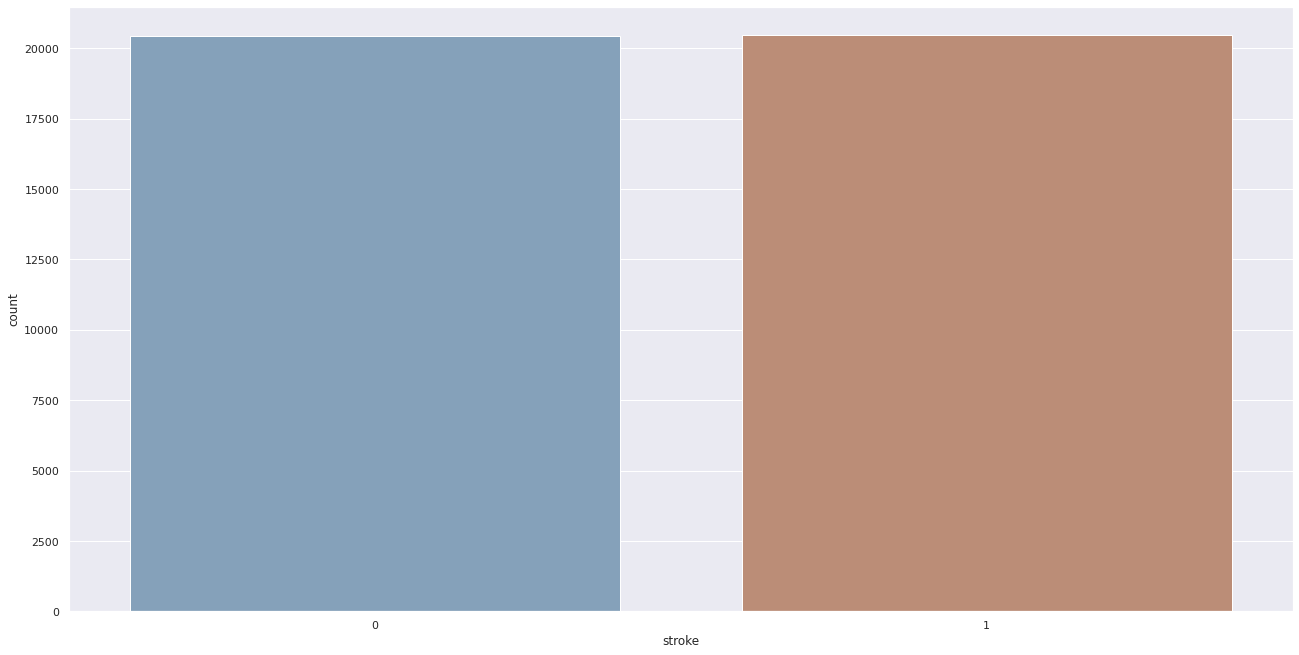

In [ ]:
plt.figure(1,figsize=(10,12))
sns.set(style='darkgrid')
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.2, right = 1.8,top = 0.9, wspace = 0.5, hspace = 0)
sns.countplot(stroke['stroke'], palette = "twilight_shifted")

## *2. Variables explicatives*

### *A. Analyse univariée*

***VARIABLES QUANTITATIVES***

In [ ]:
#Description des variables quantitatives
stroke_quant = stroke[['age','bmi','avg_glucose_level']]
stroke_quant.describe()

,age,bmi,avg_glucose_level
count,40910.000000,40910.000000,40910.000000
mean,51.327255,30.406355,122.075901
std,21.623969,6.835072,57.561531
min,-9.000000,11.500000,55.120000
25%,35.000000,25.900000,78.750000
50%,52.000000,29.400000,97.920000
75%,68.000000,34.100000,167.590000
max,103.000000,92.000000,271.740000


Text(0, 0.5, 'La moyenne glycémique')

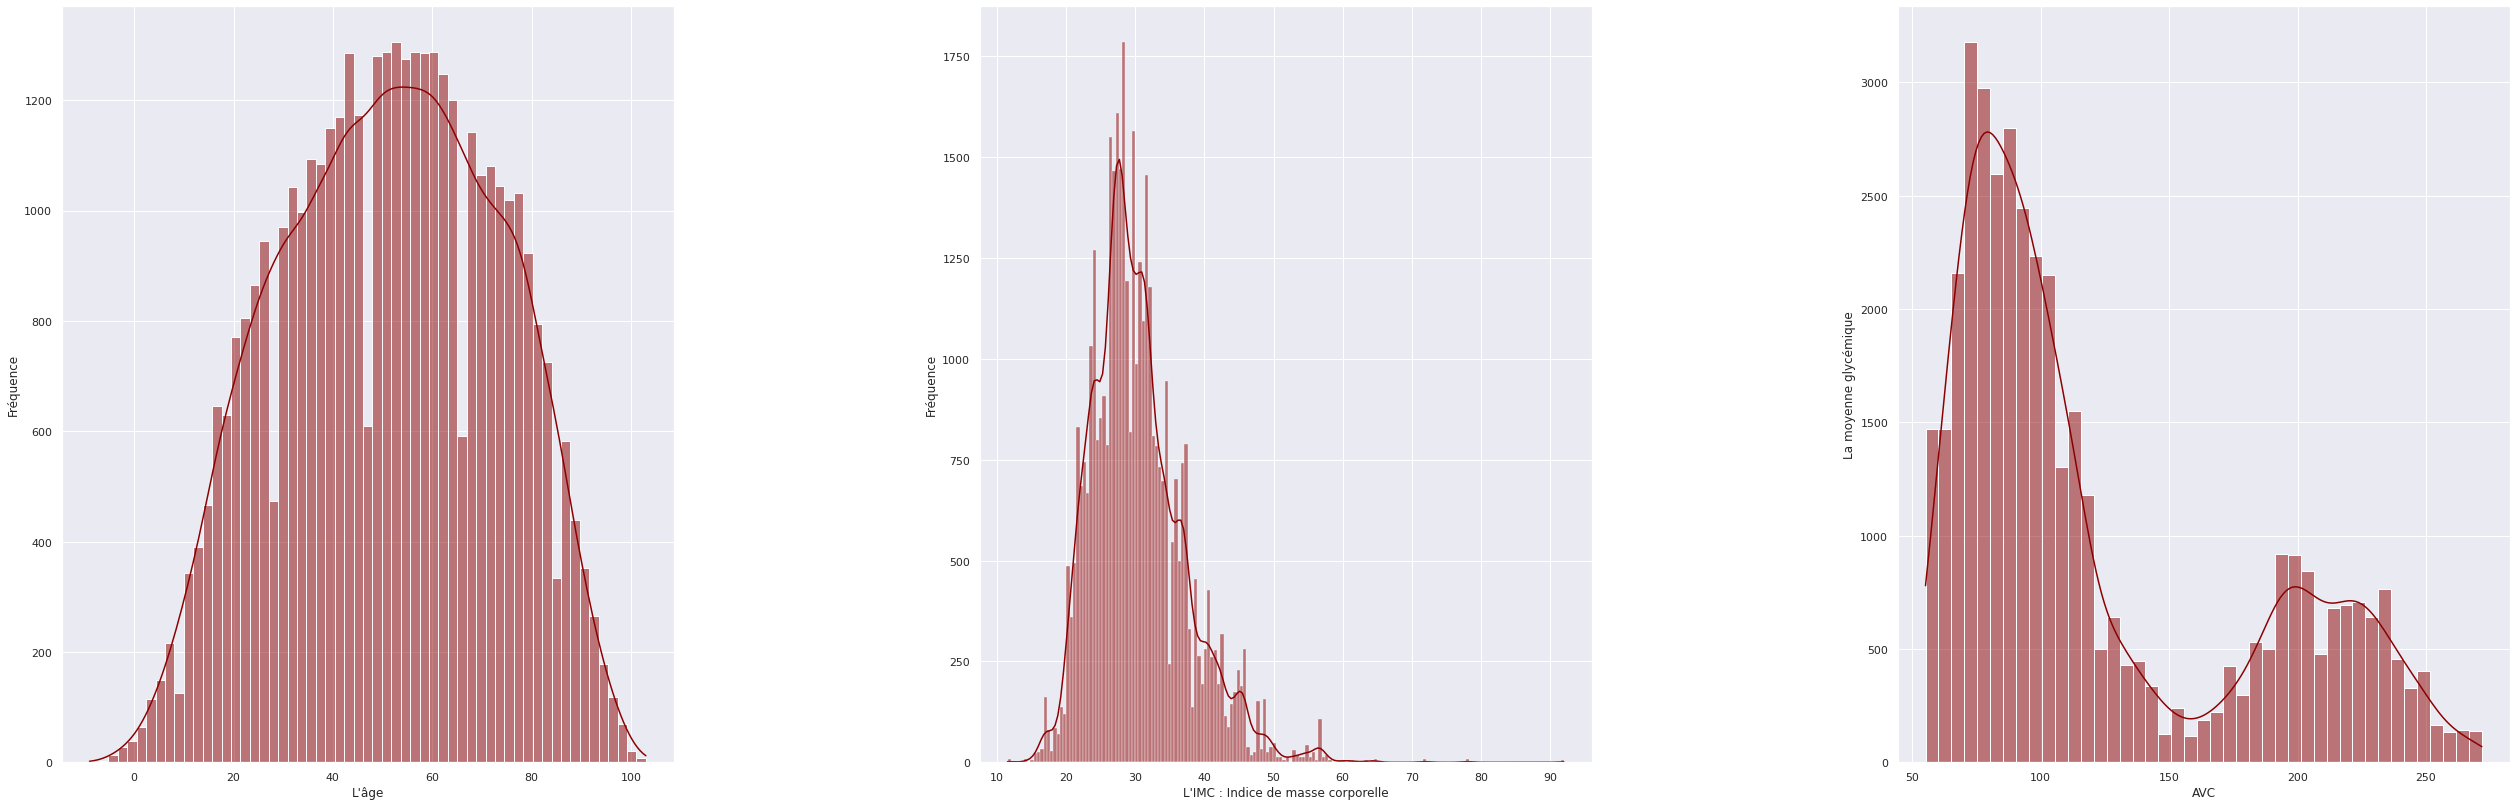

In [ ]:
#Histogrammes variables quantitatives
plt.figure(1,figsize=(20,15))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.2, right = 1.8,top = 0.9, wspace = 0.5, hspace = 0)
sns.set(style='darkgrid')
plt.subplot(1,3,1)
sns.histplot(x="age", data=stroke,kde=True, color="darkred")
plt.xlabel("L'âge")
plt.ylabel("Fréquence")
plt.subplot(1,3,2)
sns.histplot(x="bmi", data=stroke,kde=True, color="darkred")
plt.xlabel("L'IMC : Indice de masse corporelle")
plt.ylabel("Fréquence")
plt.subplot(1,3,3)
sns.histplot(x="avg_glucose_level", data=stroke,kde=True, color="darkred")
plt.xlabel("AVC")
plt.ylabel("La moyenne glycémique")

In [ ]:
#Kurtosis et Skewness des variables quantitatives
print("âge         ", "bmi         ", "avg_glucose_level ")
print(skew(stroke_quant, axis=0, bias=True))
print(kurtosis(stroke_quant, axis=0, bias=True))

âge          bmi          avg_glucose_level 
[-0.07864031  1.07734782  0.94509349]
[-0.80192815  2.63998842 -0.50359765]


***VARIABLES QUALITATIVES***

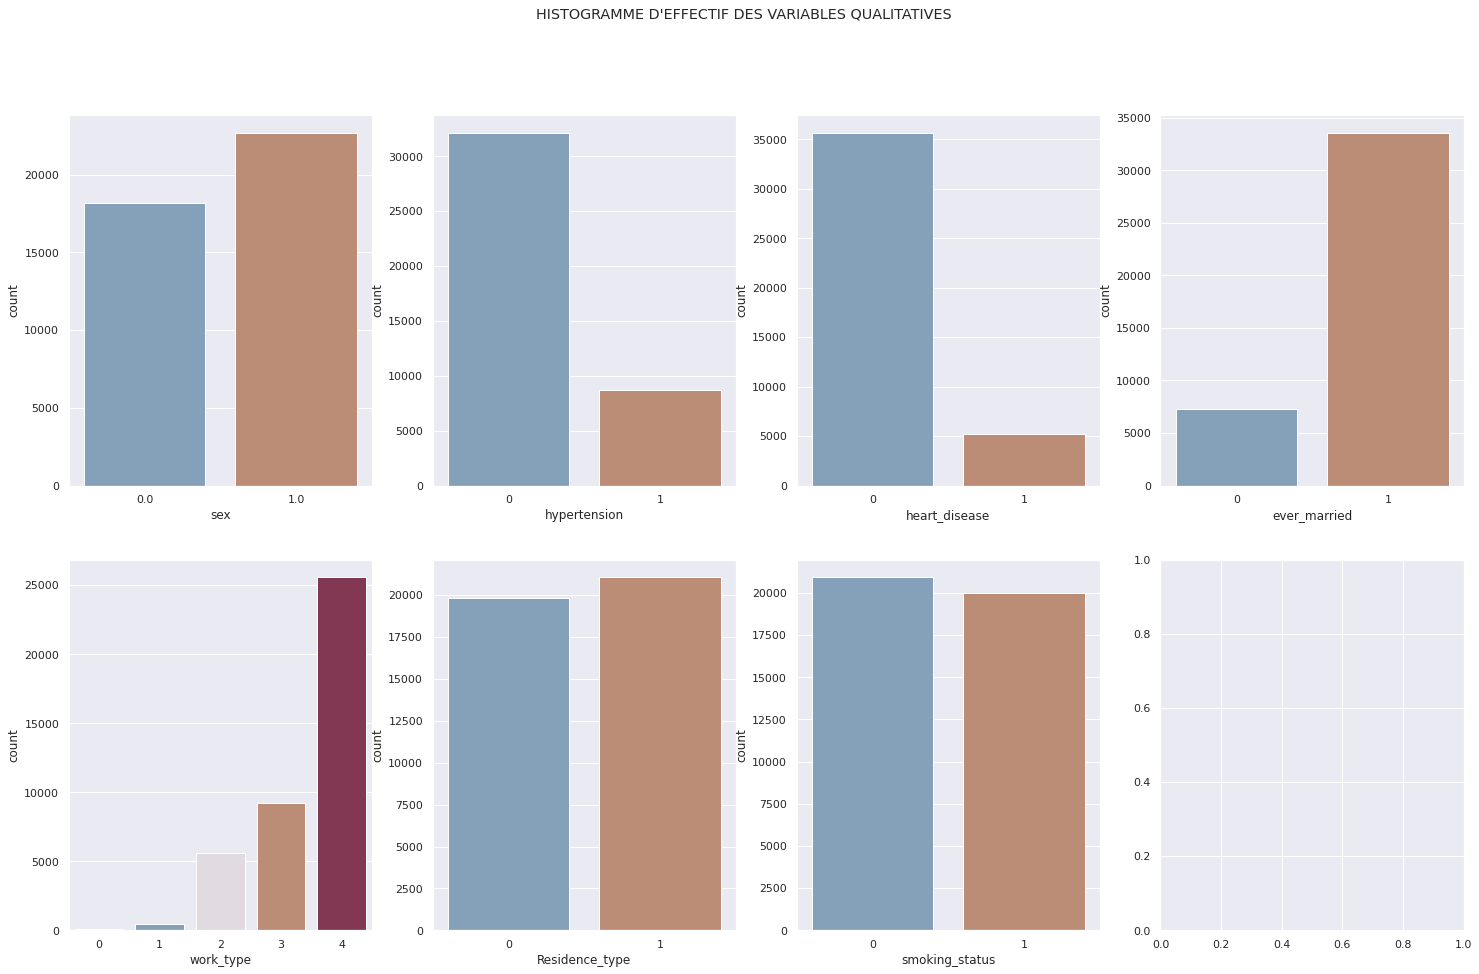

In [ ]:
stroke_qual = stroke[["sex", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status" ]]
#HISTPGRAMME D'EFFECTIFS DES VARIABLES QUALITATIVES
fig, axes = plt.subplots(2, 4, figsize=(25, 15))
fig.suptitle("HISTOGRAMME D'EFFECTIF DES VARIABLES QUALITATIVES")
sns.countplot(ax=axes[0, 0], x=stroke_qual["sex"], palette="twilight_shifted")
sns.countplot(ax=axes[0, 1], x=stroke_qual["hypertension"], palette="twilight_shifted")
sns.countplot(ax=axes[0, 2], x=stroke_qual["heart_disease"], palette="twilight_shifted")
sns.countplot(ax=axes[0, 3], x=stroke_qual["ever_married"], palette="twilight_shifted")
sns.countplot(ax=axes[1, 0], x=stroke_qual["work_type"], palette="twilight_shifted")
sns.countplot(ax=axes[1, 1], x=stroke_qual["Residence_type"], palette="twilight_shifted")
sns.countplot(ax=axes[1, 2], x=stroke_qual["smoking_status"], palette="twilight_shifted")

In [ ]:
stroke_qual.describe()

,sex,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,0.213835,0.127719,0.821340,3.461134,0.514886,0.488609
std,0.496954,0.410017,0.333781,0.383072,0.780919,0.499784,0.499876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,4.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


### *B. Analyse bivariée*

In [ ]:
#Vérifier que la base de données est bien importée & qu'elle ne possède aucune anomalie
stroke.head(10)
#Nous observons au total:
  #Variable dépendante binaire "stroke" prenant 1 si l'individu a eu un AVC et prenant 0 s'il n'a pas eu d'AVC
  #Variables explicatives : 
    #Variables binaires : sexe, hypertension, heart_disease, ever_maried, work_type, residence_type, smoking status
    #Variables quantitatives : age, avg_glucose_level, bmi
    #Variables catégorielles : work_type

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
5,1.0,55.0,1,1,1,4,0,70.09,27.4,0,1
6,0.0,82.0,0,0,0,4,1,94.39,22.8,0,1
7,0.0,17.0,1,0,1,4,0,80.43,29.7,0,1
8,1.0,31.0,0,1,1,2,0,120.46,36.8,1,1
9,0.0,55.0,0,0,1,4,1,104.51,27.3,1,1


In [ ]:
stroke.stroke.value_counts()


1    20460
0    20450
Name: stroke, dtype: int64

## *2. Types des variables*

In [ ]:
#Vérification de la nature des variables
stroke.info()
  #Nous avons en tout 40910 observations
  #Nous avons 11 colonnes donc une variable dépendante et 10 variables explicatives
#Nous remarquons que notre base de données contient des variables ayant deux types de natures différentes : des variables (entières?) qui devrait être des "int64" ainsi que des variables binaires qui devraient être catégorisés comme des "float64"
#Les variables à transformés
  #sexe : float64 => int64

#On peut tout mettre en int à part avg_glucose_level et bmi que l'on met en float car ce sont des variables quantitatives continues

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


# **II. PRÉPARATION DE LA BASE DE DONNÉES**

## *1. Nettoyage des données*

### **a. Valeur Manquantes**

In [ ]:
#Vérification des valeurs manquantes pour les colonnes
stroke.isna().sum(axis=0)
  #Nous en comptons trois des lignes sur la variables sexe qui ne présentent pas de valeurs 
  #Nous observons qu'il existe trois valeurs manquantes pour la variable sexe (supposition de toute à l'heure vérifiée)
  #Il faudra donc supprimer les lignes pour lesquelles la variable sexe présente des valeurs manquantes

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
#Suppression des lignes manquantes pour la variable sexe 
stroke_no_na=stroke.dropna(axis=0)

In [ ]:
#Vérification du nombre d'observations
stroke_no_na.info()
#Içi nous voyons que nous sommes passé d'une base de données comportant 40910 observations à 40907 observations = tout est bon

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40907 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40907 non-null  float64
 2   hypertension       40907 non-null  int64  
 3   heart_disease      40907 non-null  int64  
 4   ever_married       40907 non-null  int64  
 5   work_type          40907 non-null  int64  
 6   Residence_type     40907 non-null  int64  
 7   avg_glucose_level  40907 non-null  float64
 8   bmi                40907 non-null  float64
 9   smoking_status     40907 non-null  int64  
 10  stroke             40907 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.7 MB


In [ ]:
#Vérification des valeurs manquantes pour les lignes
stroke_no_na.isna().sum(axis=1)
#Pas de valeurs manquantes

0        0
1        0
2        0
3        0
4        0
        ..
40905    0
40906    0
40907    0
40908    0
40909    0
Length: 40907, dtype: int64

Nous pouvons donc revenir à la transformation de la nature de notre variable sexe et la transformer en integer

In [ ]:
#Transformation de la variable sexe
stroke_no_na['sex'] = stroke_no_na['sex'].astype(int)

<ipython-input-27-74f85a41d7c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_no_na['sex'] = stroke_no_na['sex'].astype(int)


In [ ]:
#Revérification
stroke_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40907 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  int64  
 1   age                40907 non-null  float64
 2   hypertension       40907 non-null  int64  
 3   heart_disease      40907 non-null  int64  
 4   ever_married       40907 non-null  int64  
 5   work_type          40907 non-null  int64  
 6   Residence_type     40907 non-null  int64  
 7   avg_glucose_level  40907 non-null  float64
 8   bmi                40907 non-null  float64
 9   smoking_status     40907 non-null  int64  
 10  stroke             40907 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.7 MB


### **b. Points atypiques**

In [ ]:
#Dans un premier temps nous faisons des boxplots pour voir s'il existe des valeurs atypiques dans notre base de données.
#Pour cela, nous faisons une base de données avec les variables quantitatives continues et discrète
stroke_box = stroke_no_na.drop(columns = ["sex","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status"])

In [ ]:
#Vérification de la base de données composée de variables quantitatives continues
stroke_box

,age,avg_glucose_level,bmi,stroke
0,63.0,228.69,36.6,1
1,42.0,105.92,32.5,1
2,61.0,171.23,34.4,1
3,41.0,174.12,24.0,1
4,85.0,186.21,29.0,1
...,...,...,...,...
40905,38.0,120.94,29.7,0
40906,53.0,77.66,40.8,0
40907,32.0,231.95,33.2,0
40908,42.0,216.38,34.5,0


In [ ]:
#GRAPHIQUES BOXPLOTS PREMIER ESSAIS : À CHOISIR ENTRE LES DEUX (tu me diras ce que tu préfères mais je préfère le deuxième)
#Création d'une fonction pour faire les boîtes à moustaches
def boxplot(var_x,var_y,couleur,title,x_title,y_title):
  sns.boxplot(x=var_x, y=var_y, data=stroke_box, palette=couleur)
  plt.title(title, fontweight="bold", fontsize="15")
  plt.xlabel(x_title, fontsize="13")
  plt.ylabel(y_title, fontsize="13")
  plt.show()

Text(0, 0.5, 'Le taux de glucose')

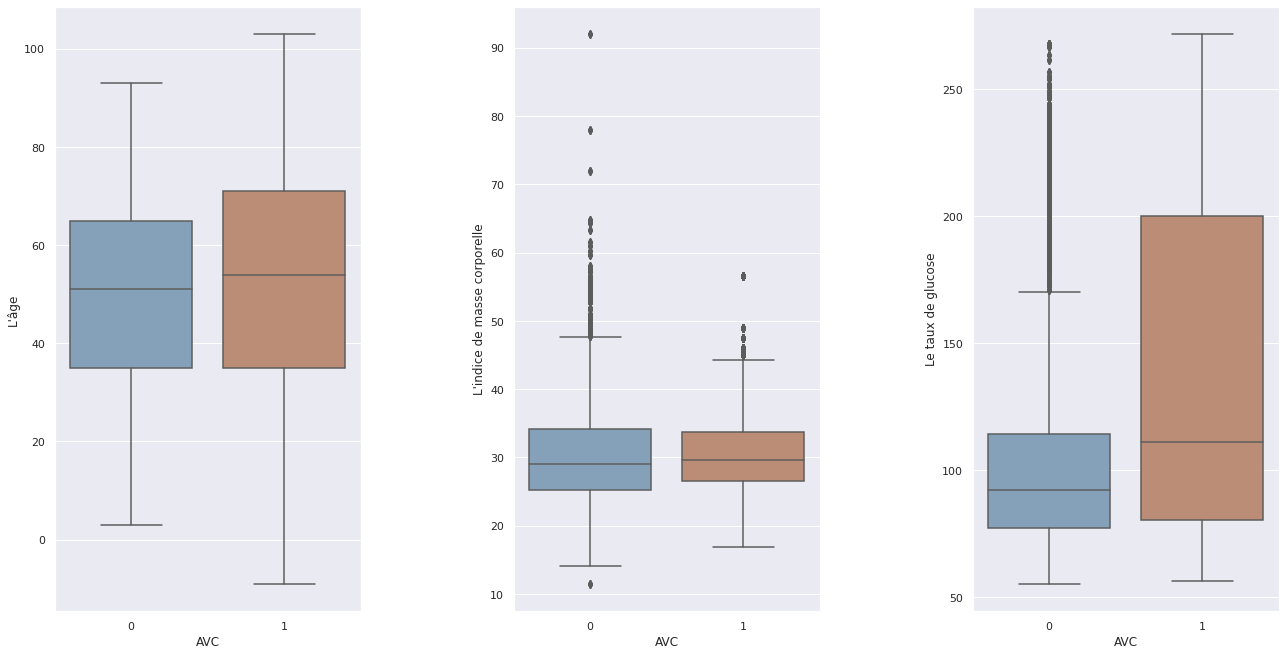

In [ ]:
#GRAPHIQUE QU'ON VA GARDER 
plt.figure(1,figsize=(10,12))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.2, right = 1.8,top = 0.9, wspace = 0.5, hspace = 0)
#plt.title("Boîtes à moustache concernant les trois variables quantitatives") => ne marche pas 
plt.subplot(1,3,1)
sns.boxplot(x="stroke",y="age",data=stroke_box, palette="twilight_shifted")
plt.xlabel("AVC")
plt.ylabel("L'âge")
plt.subplot(1,3,2)
sns.boxplot(x="stroke",y="bmi",data=stroke_box, palette="twilight_shifted")
plt.xlabel("AVC")
plt.ylabel("L'indice de masse corporelle")
plt.subplot(1,3,3)
sns.boxplot(x="stroke",y="avg_glucose_level",data=stroke_box, palette="twilight_shifted")
plt.xlabel("AVC")
plt.ylabel("Le taux de glucose")

Au vu des trois graphiques nous observons que les variables taux de glucose et l'indice de masse corporelle présente des points atypiques

In [ ]:
def grubbs_stat(y):
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    Gcal = max_of_deviations/ std_dev
    #print("Grubbs Statistics Value : {}".format(Gcal))
    return Gcal, max_ind

def calculate_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    #print("Grubbs Critical Value: {}".format(critical_value))
    return critical_value

In [ ]:
#ESD test
def ESD_Test(input_series, alpha, max_outliers):
    input_series = np.array(input_series) #Transformation de la colonne en array
    
    #Initialisation des valeurs
    nb_outliers=0
    valeur_atypique_seuil="-"

    
    #Itération pour chaque valeur de la série
    for iterations in range(max_outliers):
        Gcritical = calculate_critical_value(len(input_series), alpha)
        Gstat, max_index = grubbs_stat(input_series)
        
        #Récupère les valeurs de la dernière itération où la valeur est considéré comme atypique
        if round(Gstat,4)>round(Gcritical,4) :
            nb_outliers+=1
            valeur_atypique_seuil=input_series[max_index]
            last_Gstat=Gstat
            last_Gcritical=Gcritical
        
        #Supprime la valeur de l'itération pour tester sur d'autres
        input_series = np.delete(input_series, max_index)
   
    #Print des résultats du test
    print("Nombre de valeurs atypiques : "+ str(nb_outliers))
    print("Valeur atypique seuil : {}".format(valeur_atypique_seuil))
    
    if nb_outliers>0 :
        print('{} is an outlier. G > G-critical: {:.4f} > {:.4f} \n'.format(valeur_atypique_seuil, last_Gstat, last_Gcritical))
    
    if (max_outliers*0.8)<nb_outliers : #Marge de sécurité
        print('\033[1m' + "Veuillez augmenter le nombre d'outlier max par sécurité"+'\033[0m')
    
    return valeur_atypique_seuil

ESD_Test(stroke_box['bmi'] , 0.05, 5)

Nombre de valeurs atypiques : 5
Valeur atypique seuil : 92.0
92.0 is an outlier. G > G-critical: 9.0476 > 4.8513 

Veuillez augmenter le nombre d'outlier max par sécurité


92.0

In [ ]:
#Suppression des valeurs atypiques c'est-à-dire des valeurs supérieures à 92

In [ ]:
stroke_box

,age,avg_glucose_level,bmi,stroke
0,63.0,228.69,36.6,1
1,42.0,105.92,32.5,1
2,61.0,171.23,34.4,1
3,41.0,174.12,24.0,1
4,85.0,186.21,29.0,1
...,...,...,...,...
40905,38.0,120.94,29.7,0
40906,53.0,77.66,40.8,0
40907,32.0,231.95,33.2,0
40908,42.0,216.38,34.5,0


In [ ]:
stroke_box.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40907 entries, 0 to 40909
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                40907 non-null  float64
 1   avg_glucose_level  40907 non-null  float64
 2   bmi                40907 non-null  float64
 3   stroke             40907 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 2.6 MB


In [ ]:
stroke_fin = stroke_no_na[stroke_no_na.bmi<92]

In [ ]:
#Vérification de l'opération
stroke_fin.info()
  #Maintenant nous avons 40902 observations après avoir supprimé les valeurs égales ou supérieures à 92

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40902 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40902 non-null  int64  
 1   age                40902 non-null  float64
 2   hypertension       40902 non-null  int64  
 3   heart_disease      40902 non-null  int64  
 4   ever_married       40902 non-null  int64  
 5   work_type          40902 non-null  int64  
 6   Residence_type     40902 non-null  int64  
 7   avg_glucose_level  40902 non-null  float64
 8   bmi                40902 non-null  float64
 9   smoking_status     40902 non-null  int64  
 10  stroke             40902 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.7 MB


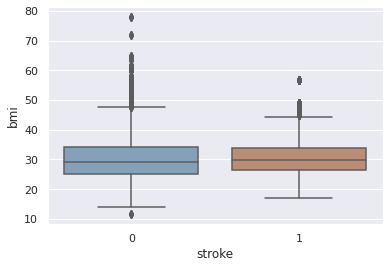

In [ ]:
sns.boxplot(x="stroke",y="bmi",data=stroke_fin, palette="twilight_shifted")

Text(0, 0.5, 'Fréquence')

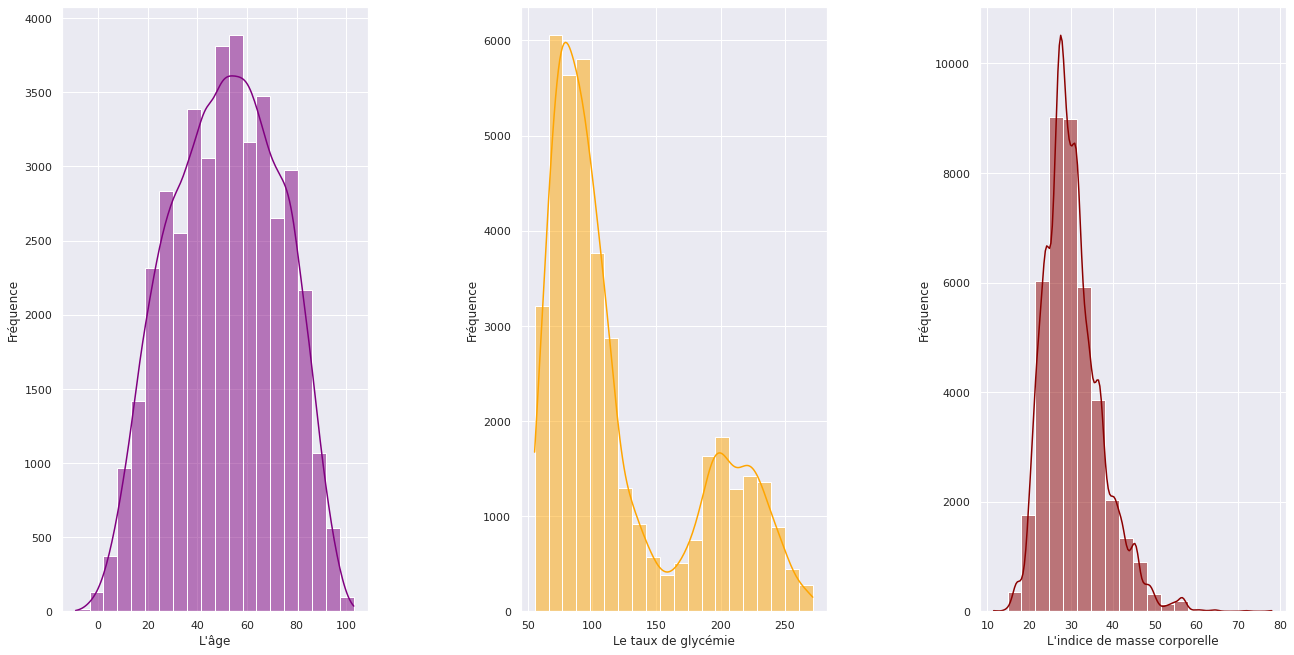

In [ ]:
#HISTOGRAMMES
plt.figure(1,figsize=(10,12))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.2, right = 1.8,top = 0.9, wspace = 0.5, hspace = 0)
plt.subplot(1,3,1)
sns.histplot(x="age", data=stroke_fin, bins=20, kde=True, color="purple")
plt.xlabel("L'âge")
plt.ylabel("Fréquence")
plt.subplot(1,3,2)
sns.histplot(x="avg_glucose_level", data=stroke_fin, bins=20, kde=True, color="orange")
plt.xlabel("Le taux de glycémie")
plt.ylabel("Fréquence")
plt.subplot(1,3,3)
sns.histplot(x="bmi", data=stroke_fin, bins=20, kde=True, color="darkred")
plt.xlabel("L'indice de masse corporelle")
plt.ylabel("Fréquence")

### **c. Dichotomisation**

In [ ]:
dummies = pd.get_dummies(stroke_fin['work_type'])
print(dummies)

       0  1  2  3  4
0      0  0  0  0  1
1      0  0  0  0  1
2      0  0  0  0  1
3      0  0  0  1  0
4      0  0  0  0  1
...   .. .. .. .. ..
40905  0  0  0  0  1
40906  0  0  0  0  1
40907  0  0  1  0  0
40908  0  0  0  1  0
40909  0  0  0  0  1

[40902 rows x 5 columns]


In [ ]:
dummies.columns = ['work_type_0', 'work_type_1','work_type_2','work_type_3','work_type_4']

In [ ]:
dummies

,work_type_0,work_type_1,work_type_2,work_type_3,work_type_4
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,0,1
...,...,...,...,...,...
40905,0,0,0,0,1
40906,0,0,0,0,1
40907,0,0,1,0,0
40908,0,0,0,1,0


In [ ]:
stroke_fin2 = stroke_fin.drop(columns = ["work_type"])


In [ ]:
stroke_fin2

,sex,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,63.0,0,1,1,1,228.69,36.6,1,1
1,1,42.0,0,1,1,0,105.92,32.5,0,1
2,0,61.0,0,0,1,1,171.23,34.4,1,1
3,1,41.0,1,0,1,0,174.12,24.0,0,1
4,1,85.0,0,0,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...
40905,1,38.0,0,0,0,1,120.94,29.7,1,0
40906,0,53.0,0,0,1,0,77.66,40.8,0,0
40907,1,32.0,0,0,1,0,231.95,33.2,0,0
40908,1,42.0,0,0,1,0,216.38,34.5,0,0


In [ ]:
#On concatène stroke_fin2 avec les variables dichotomisées
stroke_fin = pd.concat([dummies,stroke_fin2], axis = 1)

In [ ]:
stroke_fin

,work_type_0,work_type_1,work_type_2,work_type_3,work_type_4,sex,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0,0,1,1,63.0,0,1,1,1,228.69,36.6,1,1
1,0,0,0,0,1,1,42.0,0,1,1,0,105.92,32.5,0,1
2,0,0,0,0,1,0,61.0,0,0,1,1,171.23,34.4,1,1
3,0,0,0,1,0,1,41.0,1,0,1,0,174.12,24.0,0,1
4,0,0,0,0,1,1,85.0,0,0,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40905,0,0,0,0,1,1,38.0,0,0,0,1,120.94,29.7,1,0
40906,0,0,0,0,1,0,53.0,0,0,1,0,77.66,40.8,0,0
40907,0,0,1,0,0,1,32.0,0,0,1,0,231.95,33.2,0,0
40908,0,0,0,1,0,1,42.0,0,0,1,0,216.38,34.5,0,0


In [ ]:
stroke_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40902 entries, 0 to 40909
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   work_type_0        40902 non-null  uint8  
 1   work_type_1        40902 non-null  uint8  
 2   work_type_2        40902 non-null  uint8  
 3   work_type_3        40902 non-null  uint8  
 4   work_type_4        40902 non-null  uint8  
 5   sex                40902 non-null  int64  
 6   age                40902 non-null  float64
 7   hypertension       40902 non-null  int64  
 8   heart_disease      40902 non-null  int64  
 9   ever_married       40902 non-null  int64  
 10  Residence_type     40902 non-null  int64  
 11  avg_glucose_level  40902 non-null  float64
 12  bmi                40902 non-null  float64
 13  smoking_status     40902 non-null  int64  
 14  stroke             40902 non-null  int64  
dtypes: float64(3), int64(7), uint8(5)
memory usage: 4.6 MB


In [ ]:
#Transformation de la variable sexe
stroke_fin['work_type_0'] = stroke_fin['work_type_0'].astype(int)
stroke_fin['work_type_1'] = stroke_fin['work_type_1'].astype(int)
stroke_fin['work_type_2'] = stroke_fin['work_type_2'].astype(int)
stroke_fin['work_type_3'] = stroke_fin['work_type_3'].astype(int)
stroke_fin['work_type_4'] = stroke_fin['work_type_4'].astype(int)

In [ ]:
stroke_fin.work_type_0.value_counts()

0    40817
1       85
Name: work_type_0, dtype: int64

In [ ]:
stroke_fin.work_type_1.value_counts()

0    40471
1      431
Name: work_type_1, dtype: int64

In [ ]:
stroke_fin.work_type_2.value_counts()

0    35314
1     5588
Name: work_type_2, dtype: int64

In [ ]:
stroke_fin.work_type_3.value_counts()

0    31666
1     9236
Name: work_type_3, dtype: int64

In [ ]:
stroke_fin.work_type_4.value_counts()

1    25562
0    15340
Name: work_type_4, dtype: int64

On voit de très gros déséquilibres, nous allons garder l'ensemble des variables dichotomisé même si nous serions tenté de les supprimer, mais si elles posent problèmes plus tard dans l'analyse nous les supprimerons.

In [ ]:
stroke_fin

,work_type_0,work_type_1,work_type_2,work_type_3,work_type_4,sex,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0,0,1,1,63.0,0,1,1,1,228.69,36.6,1,1
1,0,0,0,0,1,1,42.0,0,1,1,0,105.92,32.5,0,1
2,0,0,0,0,1,0,61.0,0,0,1,1,171.23,34.4,1,1
3,0,0,0,1,0,1,41.0,1,0,1,0,174.12,24.0,0,1
4,0,0,0,0,1,1,85.0,0,0,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40905,0,0,0,0,1,1,38.0,0,0,0,1,120.94,29.7,1,0
40906,0,0,0,0,1,0,53.0,0,0,1,0,77.66,40.8,0,0
40907,0,0,1,0,0,1,32.0,0,0,1,0,231.95,33.2,0,0
40908,0,0,0,1,0,1,42.0,0,0,1,0,216.38,34.5,0,0


## *2. Sélection des variables*

### **a. Tests entre Stroke et les variables explicatives**

##### a.1 Variables quantitatives

In [ ]:
stroke_fin

,work_type_0,work_type_1,work_type_2,work_type_3,work_type_4,sex,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0,0,1,1,63.0,0,1,1,1,228.69,36.6,1,1
1,0,0,0,0,1,1,42.0,0,1,1,0,105.92,32.5,0,1
2,0,0,0,0,1,0,61.0,0,0,1,1,171.23,34.4,1,1
3,0,0,0,1,0,1,41.0,1,0,1,0,174.12,24.0,0,1
4,0,0,0,0,1,1,85.0,0,0,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40905,0,0,0,0,1,1,38.0,0,0,0,1,120.94,29.7,1,0
40906,0,0,0,0,1,0,53.0,0,0,1,0,77.66,40.8,0,0
40907,0,0,1,0,0,1,32.0,0,0,1,0,231.95,33.2,0,0
40908,0,0,0,1,0,1,42.0,0,0,1,0,216.38,34.5,0,0


In [ ]:

# On créé une liste avec seulement les variables quantitatives de stroke_fin
var_quant = stroke_fin.iloc[:,[6,11,12]]

# On créé une petite Boucle pour tester la normalité de chaque variable dans var_quant
for col in var_quant:
    stat, p = kstest(stroke_fin[col], 'norm')
    print(col + ': p-value =', p)
    #On print la colonne associé à la variable quantitative ainsi que sa p-value associée

age: p-value = 0.0
avg_glucose_level: p-value = 0.0
bmi: p-value = 0.0


Les 3 variables ne suivent pas une loi normale (p-value <0,05) donc nous devons passer directement au test de mann-Witney

Nous utilisons le test de Man Witney ou communément wilcoxon pour tester les différences de moyennes entre les échantillons des variables quantitatives qui ont des valeurs 1 pour la variable Stroke, et qui ont des valeurs 0 pour la variable Stroke. 

In [ ]:

#  Mann-Whitney entre stroke et age
stat, p = mannwhitneyu(stroke_fin['stroke'], stroke_fin['age'])

# interprétation des résultats
if p < 0.05:
    print("Les données sont significativement différentes entre age et stroke car la p-value est de : ",p)
else:
    print("Les données ne sont pas significativement différentes entre age et stroke car la p-value est de : ",p)

#  Mann-Whitney entre stroke et bmi
stat, p = mannwhitneyu(stroke_fin['stroke'], stroke_fin['bmi'])

# interprétation des résultats
if p < 0.05:
    print("Les données sont significativement différentes entre bmi et stroke car la p-value est de : ",p)
else:
    print("Les données ne sont pas significativement différentes entre bmi et stroke car la p-value est de : ",p)


#  Mann-Whitney entre stroke et avg_glucose_level
stat, p = mannwhitneyu(stroke_fin['stroke'], stroke_fin['avg_glucose_level'])

# interprétation des résultats
if p < 0.05:
    print("Les données sont significativement différentes entre avg_glucose_level et stroke car la p-value est de : ",p)
else:
    print("Les données ne sont pas significativement différentes entre avg_glucose_level et stroke car la p-value est de : ",p)


Les données sont significativement différentes entre age et stroke car la p-value est de :  0.0
Les données sont significativement différentes entre bmi et stroke car la p-value est de :  0.0
Les données sont significativement différentes entre avg_glucose_level et stroke car la p-value est de :  0.0


Nous conservons les 3 variables car elles permettent d'expliquer si stroke égales à 0 ou 1 pour stroke

In [ ]:
stroke_moy=stroke_fin[['age','bmi','avg_glucose_level','stroke']]

In [ ]:
stroke_moy.groupby('stroke').mean()

,age,bmi,avg_glucose_level
stroke,,,
0,50.061344,30.266217,106.810075
1,52.592669,30.531584,137.351777


##### a.2 Variables qualitatives

In [ ]:
#On créé une base avec seulement nos variable qualitative 
var_qual=stroke_fin.drop(columns=['age', 'bmi', 'avg_glucose_level'])

In [ ]:

# On créé une variable stroke contenant notre variable à expliquer stroke
stroke = var_qual['stroke']



x_qual = [col for col in var_qual.columns if col != 'stroke']

# Boucle pour effectuer le test de chi2 pour chaque variable explicative avec stroke
for col in x_qual:
    crosstab = pd.crosstab(var_qual[col], stroke)
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f'Variable explicative: {col}, p-value: {p}')

#boucle inspiré de : https://www.geeksforgeeks.org/loop-or-iterate-over-all-or-certain-columns-of-a-dataframe-in-python-pandas/

Variable explicative: work_type_0, p-value: 7.198606249761875e-20
Variable explicative: work_type_1, p-value: 2.2406663355621277e-96
Variable explicative: work_type_2, p-value: 3.92382415482602e-16
Variable explicative: work_type_3, p-value: 1.5342146692844105e-113
Variable explicative: work_type_4, p-value: 1.8969635893230332e-17
Variable explicative: sex, p-value: 6.967002827259985e-112
Variable explicative: hypertension, p-value: 0.0
Variable explicative: heart_disease, p-value: 0.0
Variable explicative: ever_married, p-value: 1.2292704288078677e-295
Variable explicative: Residence_type, p-value: 0.019175089892001108
Variable explicative: smoking_status, p-value: 2.1935300930155916e-43


In [ ]:
chi2

190.7384562639693

Toutes les p-values sont inférieures à 0,05. Cela signifie qu'au seuil de 5%, les variables explicatives qualitatives de notre modèle sont statstiquement associé à la variable stroke. 

### **b. Tests entre les variables explicatives**

##### a. variables qualitatives 

Nous effectuons le test de chi2 entre chaque paire de 

In [ ]:
import itertools
import scipy.stats as stats
import pandas as pd

#On continue avec notre variable à expliqué contenu dans stroke et les variables qualitatives dans var_quali


# Boucle pour effectuer le test de chi2 pour chaque paire de variables explicatives
for col1, col2 in itertools.combinations(x_qual, 2):
    crosstab = pd.crosstab(var_qual[col1], var_qual[col2])
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f'Variables explicatives: {col1} et {col2}, p-value: {p}')

Variables explicatives: work_type_0 et work_type_1, p-value: 0.6739423079178253
Variables explicatives: work_type_0 et work_type_2, p-value: 0.0004427530147830216
Variables explicatives: work_type_0 et work_type_3, p-value: 1.207003798606848e-06
Variables explicatives: work_type_0 et work_type_4, p-value: 3.832168651721589e-32
Variables explicatives: work_type_0 et sex, p-value: 1.0
Variables explicatives: work_type_0 et hypertension, p-value: 2.872465646456578e-06
Variables explicatives: work_type_0 et heart_disease, p-value: 0.0007536553573246182
Variables explicatives: work_type_0 et ever_married, p-value: 6.477743388327706e-86
Variables explicatives: work_type_0 et Residence_type, p-value: 2.523909530844964e-07
Variables explicatives: work_type_0 et smoking_status, p-value: 4.966110115801135e-19
Variables explicatives: work_type_1 et work_type_2, p-value: 1.8455694252472815e-16
Variables explicatives: work_type_1 et work_type_3, p-value: 3.4944210056296587e-29
Variables explicative

Pour étudier des liens de dépendance entre nos variables qualitatives nous appliquerons le
test du Khi-2. Les variables dont la valeur est inférieure à 0,05 poseront des problèmes de
dépendance dans notre analyse. Ici nous voyons que pratiquement toutes les variables entre-elles sont dépendantes. Malheureusement pour ne pas perdre trop d'information nous ne préférons pas en supprimer. 

##### b. variables quantitatives 

In [ ]:
#On récupère les variables quantitatives que nous avions déjà mis dans le data frame var_quant
var_quant

,age,avg_glucose_level,bmi
0,63.0,228.69,36.6
1,42.0,105.92,32.5
2,61.0,171.23,34.4
3,41.0,174.12,24.0
4,85.0,186.21,29.0
...,...,...,...
40905,38.0,120.94,29.7
40906,53.0,77.66,40.8
40907,32.0,231.95,33.2
40908,42.0,216.38,34.5


/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


Text(0.5, 1.0, 'Matrice de corrélation des variables quantitatives')

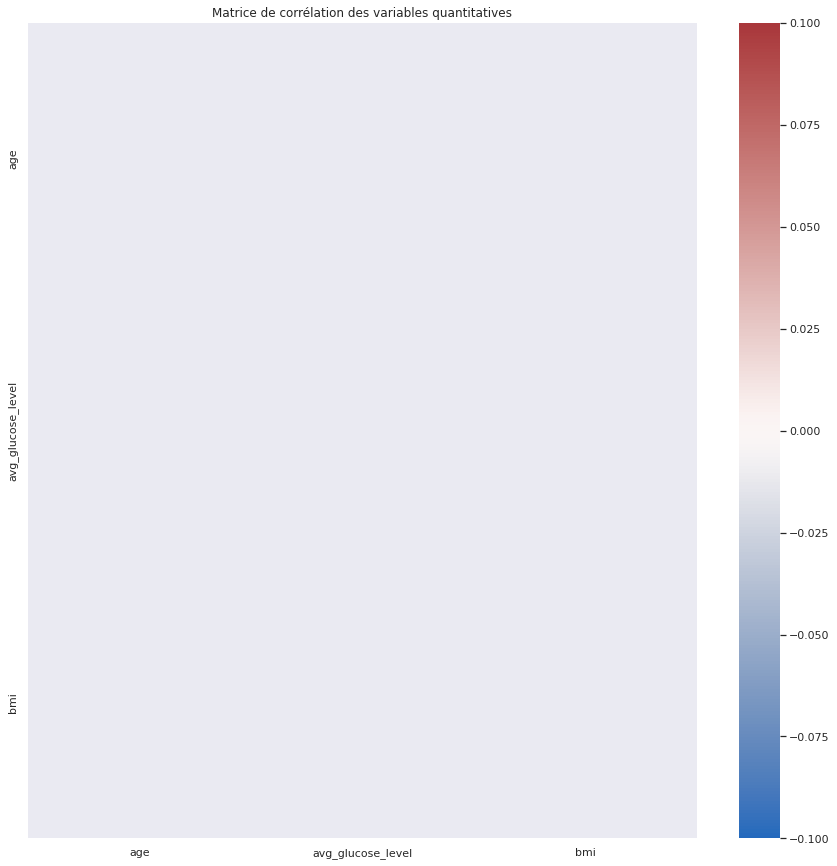

In [ ]:
fig, ax = plt.subplots (
figsize =(15,15))
matrix=var_quant._get_numeric_data().corr(method="spearman")
sns.heatmap(matrix[(abs(matrix)>=0.60) & (abs(matrix)!=1)],cmap='vlag')
plt.title("Matrice de corrélation des variables quantitatives")

Nous avons affiché la matrice des corrélations de spearman en ne gardant que les corrélations supérieures à 0,6 qui auraient posé problèmes dans notre analyse. Nous voyons qu'il n'y en a aucunes, donc nous conservons l'entièreté de nos variables explicatives

## *3. Standardisation*

Premièrement nous découpons notre jeu en train et test avant de passer à la standardisation. De plus comme les effectifs sont équilibrés entre les 0 et 1 de stroke nous n'avons pas besoin de faire de l'échantillonnage. 

In [ ]:
#On découpe le dataset en train et test
X_train , X_test, y_train, y_test = train_test_split(stroke_fin.iloc[:,:14],  
                                                    stroke_fin['stroke'], 
                                                    test_size=0.2 ,
                                                    shuffle=True ,
                                                    random_state=0
                                                   )


In [ ]:
#Nous devrons concaténer ces bases donc nous devons utiliser un reset_index
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)


In [ ]:
y_train.value_counts()

1    16397
0    16324
Name: stroke, dtype: int64

In [ ]:
y_test.value_counts()

0    4118
1    4063
Name: stroke, dtype: int64

In [ ]:
X_train=pd.DataFrame(X_train)

In [ ]:
#On utilise StandarScaler uniquement sur le X_train pour calculer les moyennes!
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,[6,11,12]])

StandardScaler()

In [ ]:
X_train.iloc[:,[6,11,12]]

,age,avg_glucose_level,bmi
0,49.0,118.03,35.5
1,45.0,112.09,24.7
2,31.0,74.98,21.4
3,68.0,100.80,45.9
4,34.0,78.92,27.7
...,...,...,...
32716,51.0,55.25,20.4
32717,39.0,67.76,26.0
32718,53.0,200.49,34.6
32719,73.0,64.45,26.7


In [ ]:
#On transforme X_train et X_test avec le calcul de moyenne et std du X_train
X_train_sc = scaler.transform(X_train.iloc[:,[6,11,12]])
X_test_sc = scaler.transform(X_test.iloc[:,[6,11,12]])

On a standardisé uniquement nos variables quantitatives, ainsi nous devons ajouter nos variables qualitative à la base X_test_sc

In [ ]:
var_quali_test = X_test.drop(columns = ["age","avg_glucose_level","bmi"])
var_quali_train = X_train.drop(columns = ["age","avg_glucose_level","bmi"])

In [ ]:
X_train_sc=pd.DataFrame(X_train_sc,columns=["age","avg_glucose_level","bmi"])
X_test_sc=pd.DataFrame(X_test_sc,columns=["age","avg_glucose_level","bmi"])

In [ ]:
var_quali_test


,work_type_0,work_type_1,work_type_2,work_type_3,work_type_4,sex,hypertension,heart_disease,ever_married,Residence_type,smoking_status
0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8176,0,0,0,0,1,1,0,0,1,1,1
8177,0,0,0,0,1,0,0,0,1,0,0
8178,0,0,0,1,0,0,0,0,1,1,0
8179,0,0,0,0,1,0,0,0,1,0,1


In [ ]:
X_train_sc2 = pd.concat([var_quali_train,X_train_sc], axis = 1)
X_test_sc2 = pd.concat([var_quali_test,X_test_sc], axis = 1)

In [ ]:
X_test_sc2
X_train_sc2


,work_type_0,work_type_1,work_type_2,work_type_3,work_type_4,sex,hypertension,heart_disease,ever_married,Residence_type,smoking_status,age,avg_glucose_level,bmi
0,0,0,0,1,0,0,0,0,1,0,1,-0.105837,-0.071585,0.755465
1,0,0,0,0,1,1,0,0,1,1,1,-0.290502,-0.174785,-0.837988
2,0,0,0,0,1,0,0,0,0,0,0,-0.936827,-0.819521,-1.324876
3,0,0,0,0,1,0,0,0,0,0,0,0.771319,-0.370933,2.289901
4,0,0,1,0,0,0,1,0,1,1,1,-0.798329,-0.751069,-0.395362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32716,0,0,0,0,1,0,0,0,0,1,0,-0.013505,-1.162303,-1.472418
32717,0,0,0,0,1,0,0,0,0,0,0,-0.567498,-0.944959,-0.646183
32718,0,0,1,0,0,1,0,0,1,0,1,0.078827,1.361046,0.622677
32719,0,0,0,0,1,1,0,0,1,1,0,1.002149,-1.002465,-0.542904


# **III. MODÉLISATION**

## *1. SVM, régression logistique et SGDClassifier*

In [ ]:
X_train_sc=pd.DataFrame(X_train_sc2)
X_test_sc=pd.DataFrame(X_test_sc2)

In [ ]:
#Regression logistique
lgr = LogisticRegression( random_state=0)
lgr.fit(X_train_sc, y_train)
y_pred_lgr=lgr.predict(X_test_sc)

#Linear SVM
l_SVC = LinearSVC(random_state=0, max_iter=2000)
l_SVC.fit(X_train_sc, y_train)
y_pred_lsvc=l_SVC.predict(X_test_sc)

#la différence entre linear svc et svc avec kernel linear c'est qu'ils n'utilisent pas la même fonction de perte 
#SVM avec kernel lineaire
svc = SVC(kernel='linear',random_state=0)
svc.fit(X_train_sc,y_train)
y_pred_svc=svc.predict(X_test_sc)

#SVM avec kernel rbf
svc_rbf = SVC(kernel='rbf',random_state=0)
svc_rbf.fit(X_train_sc,y_train)
y_pred_svc_rbf=svc_rbf.predict(X_test_sc)

#SVM avec kernel poly
svc_poly = SVC(kernel='poly',random_state=0)
svc_poly.fit(X_train_sc,y_train)
y_pred_svc_poly=svc_poly.predict(X_test_sc)

#SGD classifier
sgdc_svm = SGDClassifier(loss='hinge' ,random_state=0)
sgdc_svm.fit(X_train_sc, y_train)
y_pred_sgd=sgdc_svm.predict(X_test_sc)


In [ ]:

##### Recall #####
recall_lgr = recall_score(y_test, y_pred_lgr)
print("recall_lgr ",recall_lgr)

recall_l_SVC = recall_score(y_test, y_pred_lsvc)
print("recall_lsvc ",recall_l_SVC)

recall_svc = recall_score(y_test, y_pred_svc)
print("recall_svc ",recall_svc)

recall_svc_rbf = recall_score(y_test, y_pred_svc_rbf)
print("recall_svc_rbf ",recall_svc_rbf)

recall_svc_poly = recall_score(y_test, y_pred_svc_poly)
print("recall_svc_poly ",recall_svc_poly)

recall_sgd = recall_score(y_test, y_pred_sgd)
print("recall_sgd ",recall_sgd)

##### F1_Score ######
f1_lgr = f1_score(y_test, y_pred_lgr)
print("f1 lgr ",f1_lgr)

f1_l_SVC = f1_score(y_test, y_pred_lsvc)
print("f1 lsvc ",f1_l_SVC)

f1_svc = f1_score(y_test, y_pred_svc)
print("f1 svc ",f1_svc)

f1_svc_rbf = f1_score(y_test, y_pred_svc_rbf)
print("f1 svc rbf ",f1_svc_rbf)

f1_svc_poly = f1_score(y_test, y_pred_svc_poly)
print("f1 svc poly",f1_svc_poly)

f1_sgd = f1_score(y_test, y_pred_sgd)
print("f1 sgd ",f1_sgd)

#### AUC score ####
auc_lgr = roc_auc_score(y_test, y_pred_lgr)
print("auc lgr",auc_lgr)

auc_l_SVC = roc_auc_score(y_test, y_pred_lsvc)
print("auc lsvc",auc_l_SVC)

auc_svc = roc_auc_score(y_test, y_pred_svc)
print("auc svc",auc_svc)

auc_svc_rbf = roc_auc_score(y_test, y_pred_svc_rbf)
print("auc svc rbf",auc_svc_rbf)

auc_svc_poly = roc_auc_score(y_test, y_pred_svc_poly)
print("auc svc poly",auc_svc_poly)

auc_sgd = roc_auc_score(y_test, y_pred_sgd)
print("auc sgd",auc_sgd)

#### Matrice de confusion ####
conf_matrix_lgr = confusion_matrix(y_test, y_pred_lgr)
print("matrice lgr",conf_matrix_lgr)

conf_matrix_l_SVC = confusion_matrix(y_test, y_pred_lsvc)
print("matrice lsvc",conf_matrix_l_SVC)

conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("matrice svc",conf_matrix_svc)

conf_matrix_svc_rbf = confusion_matrix(y_test, y_pred_svc_rbf)
print("matrice svc rbf",conf_matrix_svc_rbf)

conf_matrix_svc_poly = confusion_matrix(y_test, y_pred_svc_poly)
print("matrice svc poly",conf_matrix_svc_poly)

conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)
print("conf matrice sgd",conf_matrix_sgd)

recall_lgr  0.6391828698006399
recall_lsvc  0.6305685454097957
recall_svc  0.4646812699975388
recall_svc_rbf  0.7843957666748708
recall_svc_poly  0.7587989170563623
recall_sgd  0.6138321437361556
f1 lgr  0.6720144908785095
f1 lsvc  0.6695413563308507
f1 svc  0.5770171149144254
f1 svc rbf  0.7798849871528204
f1 svc poly 0.7545276554087127
f1 sgd  0.6618017778957145
auc lgr 0.6897954174161043
auc lsvc 0.6904663999511338
auc svc 0.6603396636534561
auc svc rbf 0.780128917820194
auc svc poly 0.7548244221027318
auc sgd 0.6879262709938669
matrice lgr [[3049 1069]
 [1466 2597]]
matrice lsvc [[3090 1028]
 [1501 2562]]
matrice svc [[3525  593]
 [2175 1888]]
matrice svc rbf [[3195  923]
 [ 876 3187]]
matrice svc poly [[3092 1026]
 [ 980 3083]]
conf matrice sgd [[3138  980]
 [1569 2494]]


In [ ]:
# Get cross_val_score for each function
#model0.fit(X_train_sc, y_train, batch_size=256, epochs=30, validation_split=0.2)
cvs_RN = cross_val_score(model0, X_train_sc, y_train, cv=5)

cvs_lgr = cross_val_score(lgr, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_lsvc = cross_val_score(l_SVC, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_svc = cross_val_score(svc, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_svc_rbf = cross_val_score(svc_rbf, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_svc_poly = cross_val_score(svc_poly, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_sgdc = cross_val_score(sgdc_svm, X_train_sc, y_train, cv=5, scoring='accuracy')

On effectue une cross validation : avec 5 fold pour estimer la fiabilité des modèles par échantillonage

In [ ]:
#Get data output from cross_val_score
df_cross = pd.DataFrame(np.transpose(np.c_[cvs_lgr,cvs_lsvc,cvs_sgdc,cvs_svc,cvs_svc_rbf,cvs_svc_poly]), 
                        columns=['fold1','fold2','fold3','fold4','fold5'])
#Adding model label
df_cross['model'] = ['lgr','lsvc','sgdc','svc','svc_rbf','svc_poly']

In [ ]:
for row in range(df_cross.shape[0]):
    plt.plot( df_cross.iloc[row,0:5] ,label='Line '+str(df_cross.iloc[row,5]))

plt.legend()
plt.title("Evolution de l'accuracy en fonction des folds")
plt.show()

In [ ]:
df_cross.head(6)

,fold1,fold2,fold3,fold4,fold5,model
0,0.686325,0.693460,0.689487,0.693765,0.677414,lgr
1,0.684950,0.692848,0.688111,0.692237,0.676650,lsvc
2,0.663713,0.687347,0.681846,0.687194,0.668551,sgdc
3,0.644767,0.656326,0.655410,0.659230,0.652812,svc
4,0.777540,0.780257,0.770018,0.779187,0.775061,svc_rbf
5,0.757219,0.761308,0.748625,0.755501,0.747555,svc_poly


In [ ]:
for i in range(6):

    mean_model = df_cross.iloc[:,0:5].mean(axis=1)[i]
    std_model = df_cross.iloc[:,0:5].std(axis=1)[i]
    
    print('Le modèle N° '+ str(i) + ' a une accuray de '  + str(mean_model) + ' et un std : ' + str(std_model))

Le modèle N° 0 a une accuray de 0.6880902712274063 et un std : 0.006709582065318697
Le modèle N° 1 a une accuray de 0.6869595064075863 et un std : 0.006598758660117157
Le modèle N° 2 a une accuray de 0.6777303266272057 et un std : 0.010951446219826176
Le modèle N° 3 a une accuray de 0.6537089007641287 et un std : 0.00549969711055786
Le modèle N° 4 a une accuray de 0.7764126668671469 et un std : 0.004076124527066552
Le modèle N° 5 a une accuray de 0.7540416497783822 et un std : 0.0058405525681124205


Les modèles svc avec un noyau rbf et polynomial ont les meilleurs score de précision en moyenne sur les 5 folds, mais le modèle svc avec noyau rbf est tout de même le meilleur, avec 77,6%. C'est également le modèle avec la variance la plus faible. De plus ces modèles ont été entainé avec toutes les valeurs d'hyper-paramètres par défauts (à part la régréssion logistique et le linéaire svc qui n'ont pas d'hyper-paramètres). Nous allons donc tuner notre svm avec noyaux rbf. 

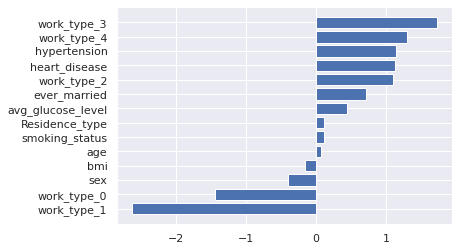

In [ ]:
#variable les plus importantes pour svm linéaire 
svm_f_importances(lgr.coef_[0],X_train_sc.columns)

* Regarder la matrice de confusion pour rentrer en détail de vos prédictions.

* Regarder les observations mal prédites et voir si elles possèdent une distribution différentes de nos données

* Changer votre feature engineering

###*Grid Search sur le SVM avec noyau rbf*

On tune le meilleur modèle 

In [ ]:
#On tune le kernel rbf avec plusieurs hyper-paramètres différents 
params = [
    {"kernel": ["rbf"], "gamma": [0.01, 0.1,0.5,1,2], "C": [1, 10, 100]}
    
]

c_svc = SVC(random_state=0)

grid_c_svc = GridSearchCV(c_svc, param_grid=params, cv=5, return_train_score=True)

In [ ]:
take_grid = grid_c_svc.fit(X_train_sc, y_train)


In [ ]:
#On garde le meilleur modèle et on refait un grid search uniquement sur ce modèle
print("La meilleur combinaison d'estimateur est: " + str(take_grid.best_params_)+"\n"
      "pour un score de: " + str(take_grid.best_score_))

La meilleur combinaison d'estimateur est: {'C': 100, 'gamma': 2, 'kernel': 'rbf'}
pour un score de: 0.932826001483056


In [ ]:
#SVM avec kernel rbf
svc_rbf_final = SVC(kernel='rbf', gamma=2, C=100,random_state=0)
svc_rbf_final.fit(X_train_sc,y_train)
y_pred_svc_rbf_final=svc_rbf_final.predict(X_test_sc)

In [ ]:
recall_svc_rbf = recall_score(y_test, y_pred_svc_rbf_final)
print("recall_svc_rbf ",recall_svc_rbf)


f1_svc_rbf = f1_score(y_test, y_pred_svc_rbf_final)
print("f1 svc rbf ",f1_svc_rbf)

auc_svc_rbf = roc_auc_score(y_test, y_pred_svc_rbf_final)
print("auc svc rbf",auc_svc_rbf)

conf_matrix_svc_rbf = confusion_matrix(y_test, y_pred_svc_rbf_final)
print("matrice svc rbf",conf_matrix_svc_rbf)

recall_svc_rbf  0.9768643859217327
f1 svc rbf  0.9396306818181819
auc svc rbf 0.9379222366714054
matrice svc rbf [[3702  416]
 [  94 3969]]


On compare avec le jeu train pour vérifier qu'il n'y ait pas de sur ou sous ajustement

In [ ]:
y_pred=svc_rbf_final.predict(X_train_sc)

recall_svc_rbf = recall_score(y_train, y_pred)
print("recall_svc_rbf ",recall_svc_rbf)

f1_svc_rbf = f1_score(y_train, y_pred)
print("f1 svc rbf ",f1_svc_rbf)

auc_svc_rbf = roc_auc_score(y_train, y_pred)
print("auc svc rbf",auc_svc_rbf)

conf_matrix_svc_rbf = confusion_matrix(y_train, y_pred)
print("matrice svc rbf",conf_matrix_svc_rbf)

recall_svc_rbf  0.987436726230408
f1 svc rbf  0.9694338831841451
auc svc rbf 0.9687551188123371
matrice svc rbf [[15509   815]
 [  206 16191]]


Les valeurs entre le jeu train et test sont très proches donc même si les score avec notre jeu test sont élevés, nous ne soupçonnons pas de sur ou sous ajustement avec notre modèle. 

## *2. Réseau de neuronnes*

In [ ]:
#Indicateur de modèle
def indicateur(model,X,y,ech) :
    model.predict(X)
    valid_pred=model.predict(X).round()
    
    print("\033[1m" + "Indicateur de l'échantillon " + ech + " : " + '\033[0m')
    print("Matrice de confusion : {}".format(str(confusion_matrix(y, valid_pred))))
    print("Qualité du modèle : {}".format(str(round(metrics.accuracy_score(y, valid_pred),2))))
    print("Taux d'erreur : {}".format(str(round(1-metrics.accuracy_score(y, valid_pred),2))))

    print("Recall : {}".format(str(round(metrics.recall_score(y, valid_pred, average="macro"),2))))
    print("Precision : {}".format(str(round(metrics.precision_score(y, valid_pred, average="macro"),2))))
    print("F1 score : {}".format(str(round(metrics.f1_score(y, valid_pred, average="macro"),2))))

In [ ]:
keras.backend.clear_session()

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(features, output, test_size=0.25)

keras.backend.clear_session()

model0 = Sequential()
model0.add(Dense(100,input_dim=X_train_sc.shape[1], activation='relu'))
model0.add(Dense(1, activation='sigmoid'))
model0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['recall'])

print(model0.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1500      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Compil model parameter
model0.compile(loss="binary_crossentropy", 
                  optimizer="adam",
                  metrics=["accuracy"]
                 )

In [ ]:
history = model0.fit(X_train_sc, y_train, batch_size=256, epochs=30, validation_split=0.2)

Epoch 1/30
103/103 [==============================] - 2s 7ms/step - loss: 0.6234 - accuracy: 0.6606 - val_loss: 0.5984 - val_accuracy: 0.6833
Epoch 2/30
103/103 [==============================] - 0s 3ms/step - loss: 0.5780 - accuracy: 0.6981 - val_loss: 0.5779 - val_accuracy: 0.6964
Epoch 3/30
103/103 [==============================] - 0s 3ms/step - loss: 0.5632 - accuracy: 0.7089 - val_loss: 0.5668 - val_accuracy: 0.7082
Epoch 4/30
103/103 [==============================] - 0s 3ms/step - loss: 0.5531 - accuracy: 0.7160 - val_loss: 0.5584 - val_accuracy: 0.7091
Epoch 5/30
103/103 [==============================] - 0s 3ms/step - loss: 0.5451 - accuracy: 0.7224 - val_loss: 0.5539 - val_accuracy: 0.7126
Epoch 6/30
103/103 [==============================] - 0s 3ms/step - loss: 0.5390 - accuracy: 0.7265 - val_loss: 0.5470 - val_accuracy: 0.7190
Epoch 7/30
103/103 [==============================] - 0s 3ms/step - loss: 0.5329 - accuracy: 0.7298 - val_loss: 0.5402 - val_accuracy: 0.7257
Epoch 

In [ ]:
#model0.fit(X_train_sc, y_train, batch_size=256, epochs=30, validation_split=0.2)

In [ ]:
from sklearn import metrics
indicateur(model0,X_train_sc, y_train,"Train")
indicateur(model0,X_test_sc, y_test,"Test")

1023/1023 [==============================] - 1s 1ms/step
Indicateur de l'échantillon Train : 
Matrice de confusion : [[12788  3536]
 [ 3443 12954]]
Qualité du modèle : 0.79
Taux d'erreur : 0.21
Recall : 0.79
Precision : 0.79
F1 score : 0.79
256/256 [==============================] - 0s 1ms/step
Indicateur de l'échantillon Test : 
Matrice de confusion : [[3216  902]
 [ 881 3182]]
Qualité du modèle : 0.78
Taux d'erreur : 0.22
Recall : 0.78
Precision : 0.78
F1 score : 0.78


###*Grid Search sur le RN*

In [ ]:
#Réseau de neurones
def build_clf(n_hidden,n_neurons,input_shape):
    keras.backend.clear_session()
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=input_shape))#input layer
    
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(units=n_neurons, activation='relu'))

    model.add(keras.layers.Dense(units=1, activation='sigmoid'))
    model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model


In [ ]:
#X_train_sc4 = np.asarray(X_train_sc3).astype(np.float32)
#X_test_sc4 = np.asarray(X_test_sc3).astype(np.float32)

In [ ]:
keras.backend.clear_session()

In [ ]:
#!pip install scikeras

In [ ]:
#from scikeras.wrappers import KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier
import time

In [ ]:
keras.backend.clear_session()

In [ ]:
ann_model=KerasClassifier(build_fn=build_clf)

<ipython-input-103-20b530f7deca>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model=KerasClassifier(build_fn=build_clf)


In [ ]:
#Réseau de neurones : GridSearch 
t0 = time.time()

params={
    "n_hidden": [1,2,3],
    'n_neurons':[10,25,50,75,100],
    'input_shape' : [14],
        }


gs=GridSearchCV(estimator=ann_model, param_grid=params, cv=5)


In [ ]:
grid_ann = gs.fit(X_train_sc, y_train)

t1 = time.time()
print("{} s".format(t1 - t0))

1023/1023 [==============================] - 4s 3ms/step - loss: 0.5371 - accuracy: 0.7234
308.59616231918335 s


In [ ]:
print(grid_ann.best_params_, grid_ann.best_score_)

{'input_shape': 14, 'n_hidden': 3, 'n_neurons': 100} 0.7493350386619568


In [ ]:
n_hidden=grid_ann.best_params_["n_hidden"]
n_neurons=grid_ann.best_params_["n_neurons"]
input_shape=grid_ann.best_params_["input_shape"]

In [ ]:
#Meilleur modèle
ann_best=build_clf(n_hidden, n_neurons,input_shape)
history=ann_best.fit(X_train_sc, y_train,batch_size=272,epochs=50, validation_split=0.2)

Epoch 1/50
97/97 [==============================] - 1s 7ms/step - loss: 0.5930 - accuracy: 0.6847 - val_loss: 0.5623 - val_accuracy: 0.7066
Epoch 2/50
97/97 [==============================] - 1s 6ms/step - loss: 0.5327 - accuracy: 0.7282 - val_loss: 0.5280 - val_accuracy: 0.7207
Epoch 3/50
97/97 [==============================] - 1s 6ms/step - loss: 0.4936 - accuracy: 0.7536 - val_loss: 0.4824 - val_accuracy: 0.7626
Epoch 4/50
97/97 [==============================] - 1s 6ms/step - loss: 0.4557 - accuracy: 0.7775 - val_loss: 0.4473 - val_accuracy: 0.7840
Epoch 5/50
97/97 [==============================] - 1s 5ms/step - loss: 0.4225 - accuracy: 0.7995 - val_loss: 0.4133 - val_accuracy: 0.8066
Epoch 6/50
97/97 [==============================] - 1s 6ms/step - loss: 0.3929 - accuracy: 0.8152 - val_loss: 0.3860 - val_accuracy: 0.8248
Epoch 7/50
97/97 [==============================] - 1s 5ms/step - loss: 0.3605 - accuracy: 0.8333 - val_loss: 0.3582 - val_accuracy: 0.8376
Epoch 8/50
97/97 [==

In [ ]:
indicateur(ann_best,X_train_sc, y_train,"Train")
indicateur(ann_best,X_test_sc, y_test,"Test")

1023/1023 [==============================] - 2s 1ms/step
Indicateur de l'échantillon Train : 
Matrice de confusion : [[15755   569]
 [  513 15884]]
Qualité du modèle : 0.97
Taux d'erreur : 0.03
Recall : 0.97
Precision : 0.97
F1 score : 0.97
256/256 [==============================] - 0s 1ms/step
Indicateur de l'échantillon Test : 
Matrice de confusion : [[3959  159]
 [ 143 3920]]
Qualité du modèle : 0.96
Taux d'erreur : 0.04
Recall : 0.96
Precision : 0.96
F1 score : 0.96
